# QUESTION 1

## _1._ __A Brief Understanding of The Project Idea__
+ ### The dataset `HousingData.xlsx` provided contains 506 housing records with variables such as crime rate (CRIM), average rooms per dwelling (RM), pupil–teacher ratio (PTRATIO), property tax rate (TAX), and median home value (MO). From a business perspective, the primary objective is to understand the factors that influence housing prices and to build a predictive model that can estimate property values.

+ ### This understanding can support real-estate stakeholders, urban planners, and policy makers in making informed decisions regarding pricing strategies, taxation policies, and neighborhood development. For example, knowing how crime rate or accessibility to highways impacts property values enables better investment targeting and strategic planning.

+ ### The data mining goal is therefore to use these socioeconomic and environmental variables to predict the median value of owner-occupied homes (MO) and to identify the most influential drivers of housing prices.

----

## _2._ __Data Understanding and Preparation__
### The dataset consists of 506 observations and 15 variables. Each row represents a housing record, while columns capture socioeconomic, environmental, and structural characteristics of the housing unit or neighborhood.

## __Key variables visible in the dataset include:__

+ ### CRIM – per capita crime rate by town.

+ ### AC – proportion of residential land zoned for large lots.

+ ### INDUS – proportion of non-retail business acres per town.

+ ### LS – whether the tract borders the Charles River (binary).

+ ### PR – nitric oxides concentration (pollution level).

+ ### RM – average number of rooms per dwelling.

+ ### AGE – proportion of owner-occupied homes built before 1940.

+ ### DIS – weighted distance to employment centers.

+ ### RAD – accessibility index to radial highways.

+ ### PTRATIO – pupil–teacher ratio by town.

+ ### DMT – demographic index (1000(Bk – 0.63)²).

+ ### LSTAT – percentage of lower status population.

+ ### MO – median value of owner-occupied homes (target variable).

+ ### TAX – property tax rate.
----

In [1]:
#Importing the necessary libraries.

import pandas as pd  # Data manipulation and analysis
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization

In [2]:
#Loading the dataset
house = pd.read_excel("HousingData.xlsx")
house

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,602,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,NaN,1.0,21.0,NaN,9.67,4.0,273.0
502,603,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,6.0,273.0
503,604,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,9.0,273.0
504,605,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,2.0,273.0


In [3]:
#Displaying the data types
house.dtypes

PID          int64
CRIM       float64
AC         float64
INDUS      float64
LS         float64
PR         float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
PTRATIO    float64
DMT        float64
LSTAT      float64
MO         float64
TAX        float64
dtype: object

Personal ID (PID) is supposed to be in string data type even though it is in numeric form

In [4]:
#Changing the datatype from 'int' to 'str'.
house['PID'] = house['PID'].astype(str)
house.dtypes

PID         object
CRIM       float64
AC         float64
INDUS      float64
LS         float64
PR         float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
PTRATIO    float64
DMT        float64
LSTAT      float64
MO         float64
TAX        float64
dtype: object

In [5]:
house.describe() #Displaying descriptive statistics

,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


In [6]:
house.isna().sum().sum() #Checking for total missing values

np.int64(31)

### 31 total missing values

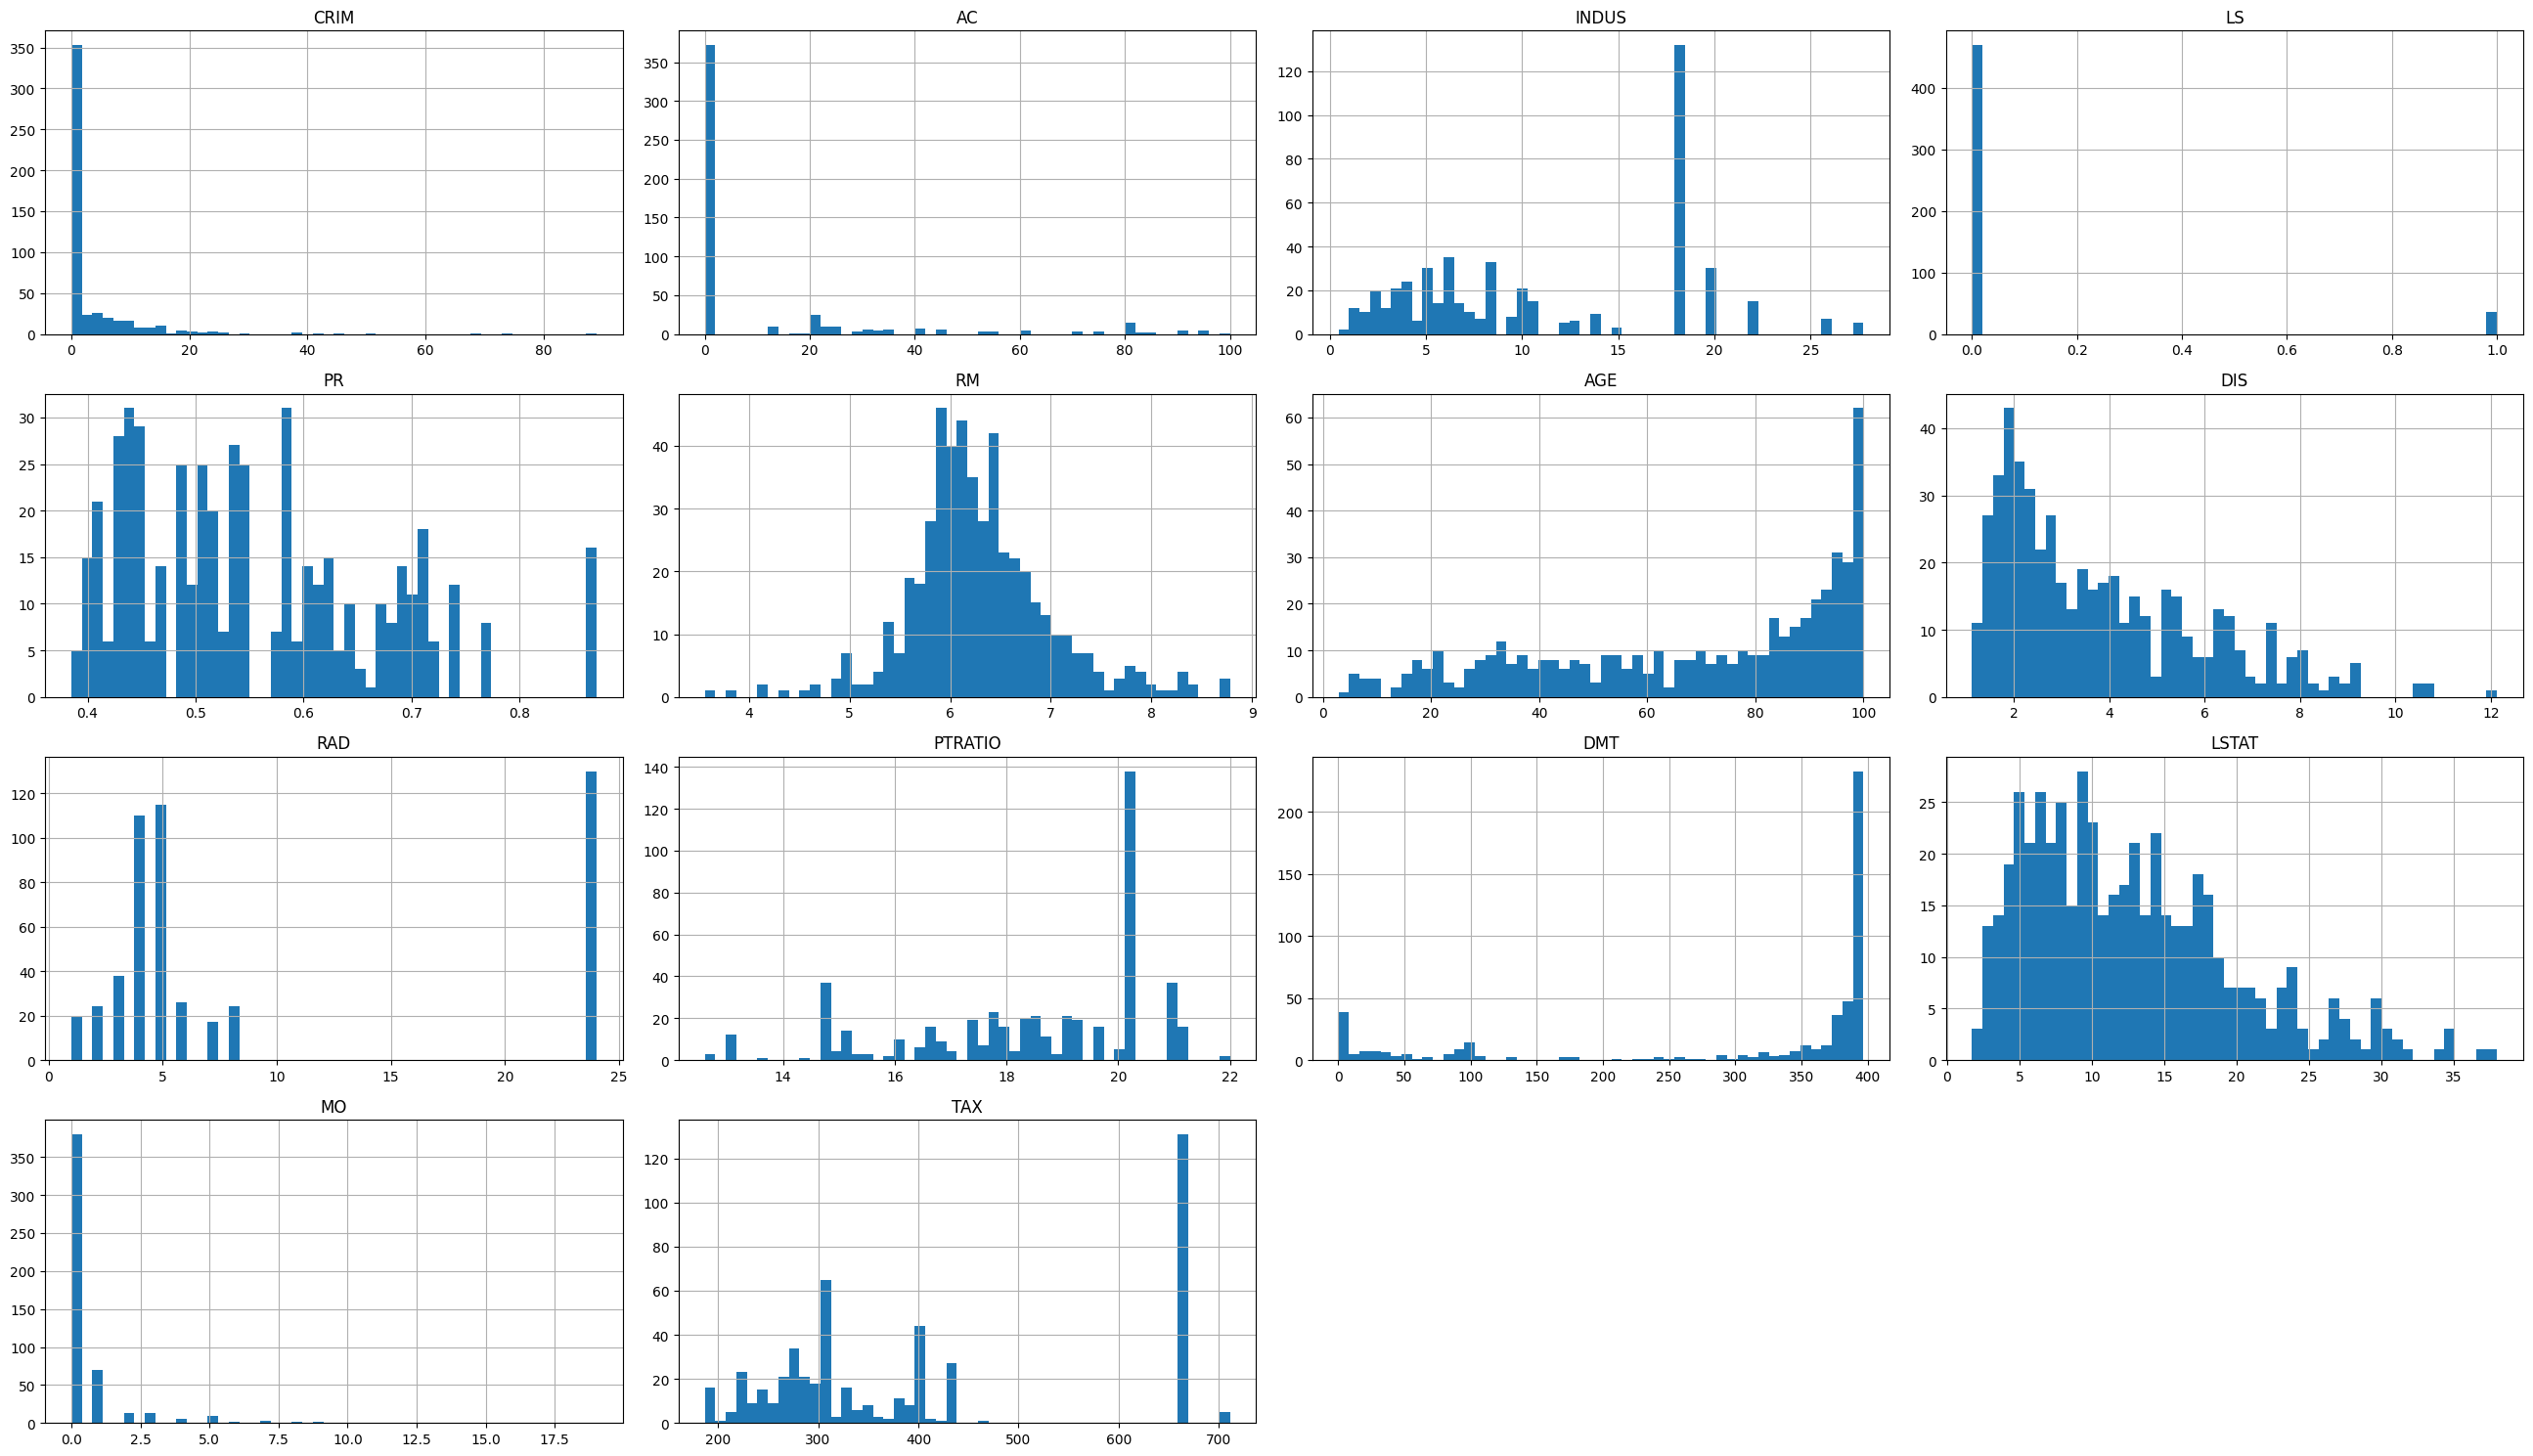

In [7]:
# Histogram to show their distribution
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(26, 15))
plt.tight_layout()
plt.show()

In [8]:
num_vars = house.select_dtypes(include='Float64')
columns = ['CRIM', 'AC', 'INDUS', 'LS', 'PR', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'DMT', 'LSTAT', 'MO', 'TAX']
house[columns] = house[columns].fillna(house[columns].median())#Imputing the missing values using median since they were skewed

In [9]:
house.isna().sum().sum() # No missing values were found

np.int64(0)

In [10]:
house.info() #General important information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    object 
 1   CRIM     506 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       506 non-null    float64
 5   PR       506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  DMT      506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MO       506 non-null    float64
 14  TAX      506 non-null    float64
dtypes: float64(14), object(1)
memory usage: 59.4+ KB


In [11]:
house.duplicated().sum() #Checking for duplicates

np.int64(0)

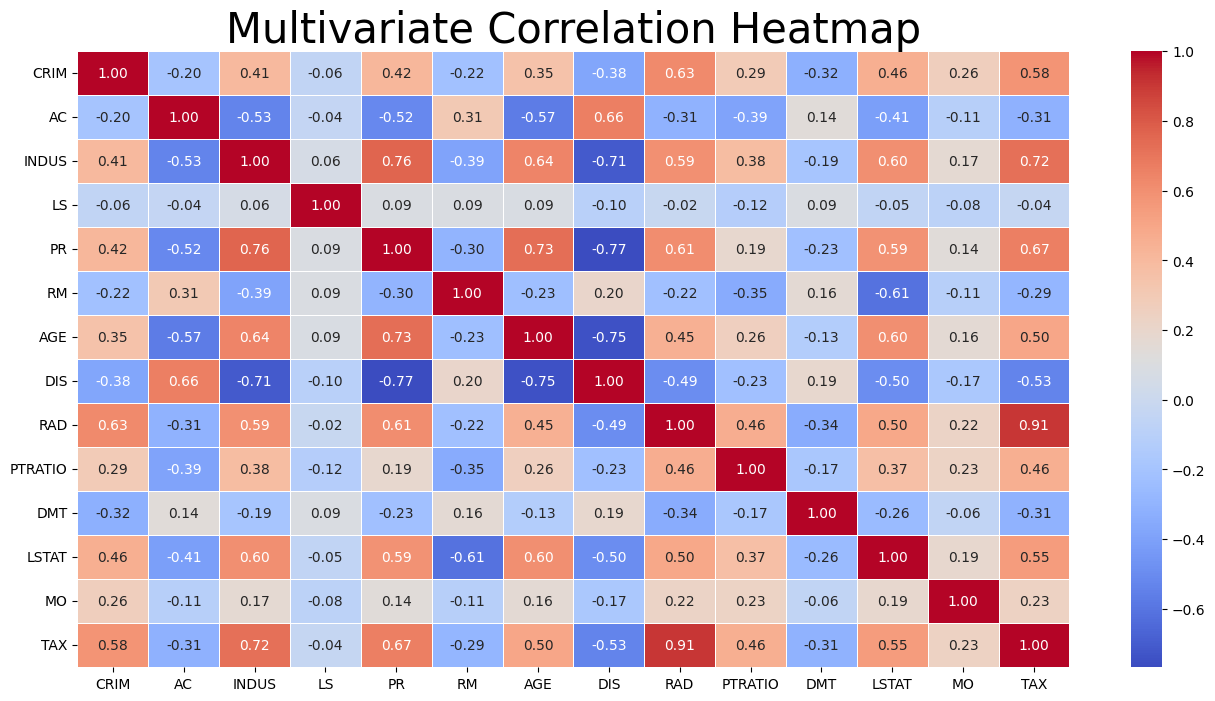

In [12]:
# A Simple Multivariate Analysis Heatmap
correlation_matrix = num_vars.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Multivariate Correlation Heatmap", fontsize=30)
plt.show()

----
### _Where the bright red shows very positive correlation and dark blue shows very negative corelation_
----

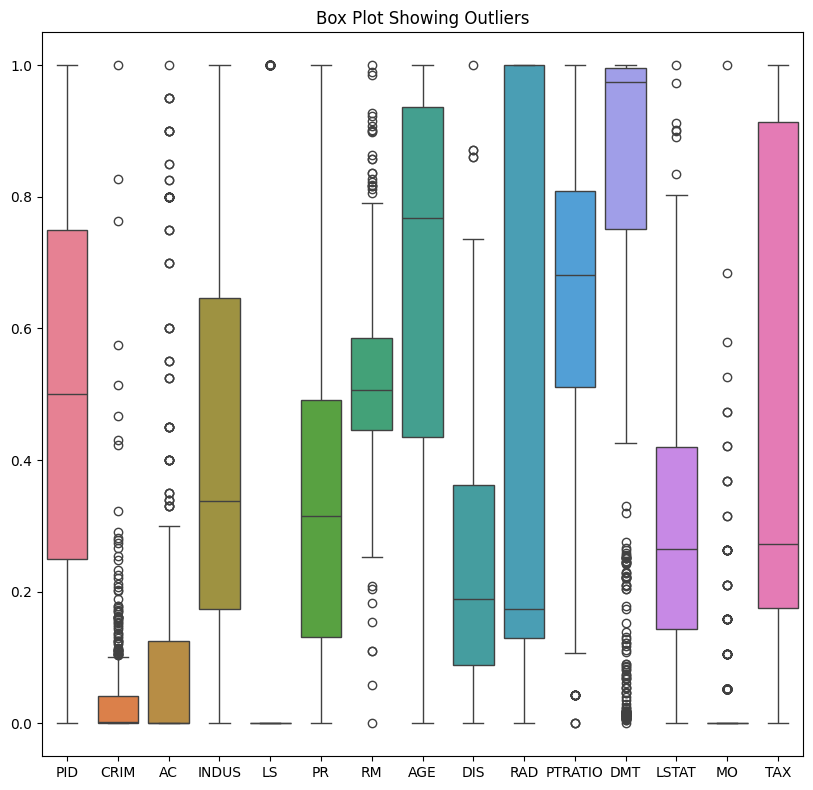

In [13]:
# Checking for outliers and handling them

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(house), columns=house.columns) # Scaling the data to a range of [0, 1] using MinMaxScaler

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_scaled)
plt.title("Box Plot Showing Outliers")
plt.tight_layout()
plt.show()

----
### _Since most values under `MO` are `0`, I choosing __not__ to handle outliers_
----

## __4. Modelling__

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate features and target
X = house.drop('MO', axis=1)
y = house['MO']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing: scale numeric and encode categorical
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])


In [15]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature-target split
X = house.drop('MO', axis=1) 
y = house['MO']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Using Linear Regression model

# Create a pipeline: preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('regressor', LinearRegression())
])

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'R²: {r2:.3f}')
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.2f}%')


R²: 0.096
MAE: 1.018
RMSE: 1.665
MAPE: inf%


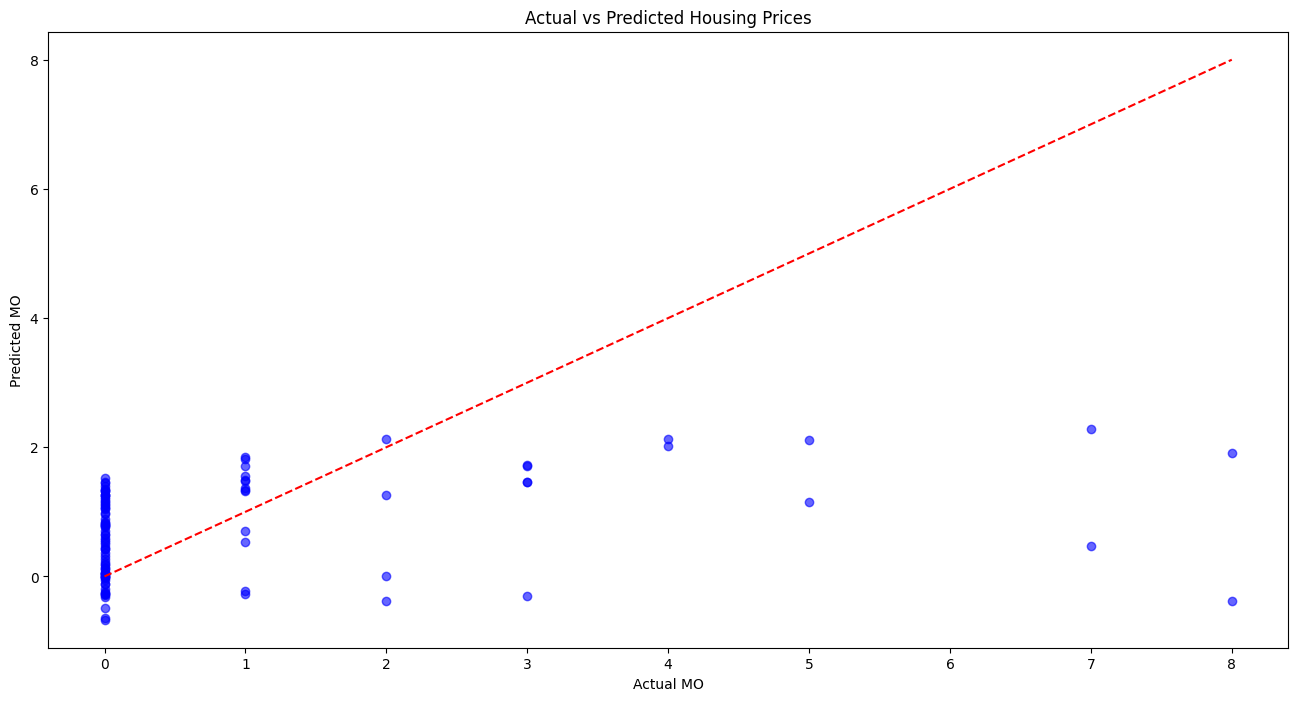

In [19]:
# Plotting predicted vs. actual

plt.figure(figsize=(16,8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MO')
plt.ylabel('Predicted MO')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

In [20]:
import joblib

# Save the trained model
joblib.dump(model, 'house_price_model.pkl')

# Load and use the model
loaded_model = joblib.load('house_price_model.pkl')
sample_prediction = loaded_model.predict(X_test.iloc[[0]])
print(f'Predicted MO for first test sample: {sample_prediction[0]:.2f}')

Predicted MO for first test sample: 0.56


# QUESTION 2

### __Data Preparation and Understanding__

In [23]:
# Loading the dataset
yields = pd.read_excel("Cassava_Yield_Data.xlsx")
yields

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2,2,3,3,conv,F1100,19,0,0.0,33,1.0,220,2.1,253,13.315789,3.1,4.2,10000,7380.952381,602380.952381
111,2,2,3,3,conv,F5300,16,0,0.0,22,1.0,204,1.9,226,14.125000,2.9,4.2,10000,6904.761905,538095.238095
112,2,2,3,3,conv,F2150,13,0,0.0,8,0.4,52,1.2,60,4.615385,1.6,4.2,10000,3809.523810,142857.142857
113,2,2,3,3,conv,F4250,20,0,0.0,42,1.9,91,1.8,133,6.650000,3.7,4.2,10000,8809.523810,316666.666667


### A Breakdown of The Meaning of the variables in the `Cassava_Yield_Data.xlsx`.


| Column                | Meaning                                                                         |
| --------------------- | ------------------------------------------------------------------------------- |
| `Sesn`                | Season or experimental cycle (numeric code, e.g., 1 or 2)                       |
| `locn`                | Location or field site code                                                     |
| `block`               | Block number in the experimental design (used in randomized block designs)      |
| `rep`                 | Replication number (used to repeat treatments for statistical reliability)      |
| `tillage`             | Type of tillage applied, e.g., `conv` might mean conventional tillage           |
| `ferT`                | Fertilizer type/code applied, e.g., `F1100`, `F2150` (these are the treatments) |
| `Plants_harvested`    | Number of cassava plants harvested from the plot                                |
| `No_bigtubers`        | Number of large tubers harvested                                                |
| `weigh_bigtubers`     | Total weight of the large tubers (kg)                                           |
| `No_mediumtubers`     | Number of medium-sized tubers harvested                                         |
| `weight_mediumtubers` | Total weight of medium tubers                                                   |
| `No_smalltubers`      | Number of small tubers harvested                                                |
| `weight_smalltubers`  | Total weight of small tubers                                                    |
| `No_roots`            | Total number of roots (tubers) harvested                                        |
| `Weight_roots`        | Total weight of roots harvested                                                 |
| `No_damagedroots`     | Number of damaged roots (not marketable)                                        |
| `Weight_damagedroots` | Weight of damaged roots                                                         |
| `Yield`               | Total yield (possibly in kg or g per plot)                                      |
| `HA`                  | Yield normalized per hectare                                                    |
| `Cost`                | Cost of fertilizer per plot or hectare                                          |
| `Revenue`             | Revenue from the plot yield                                                     |
| `Profit`              | Revenue minus cost                                                              |


In [24]:
#Checking data types
yields.dtypes

Sesn                       int64
locn                       int64
block                      int64
rep                        int64
tillage                   object
ferT                      object
Plants_harvested           int64
No_bigtubers               int64
Weigh_bigtubers          float64
No_mediumtubers            int64
Weight_mediumtubers      float64
No_smalltubers             int64
Weight_smalltubers       float64
Totaltuberno               int64
AV_tubers_Plant          float64
Total_tubweight          float64
plotsize                 float64
HEC                        int64
TotalWeightperhectare    float64
TotalTuberperHectare     float64
dtype: object

In [25]:
#Checking for missing and therefore handling
yields.isna().sum()

Sesn                     0
locn                     0
block                    0
rep                      0
tillage                  0
ferT                     0
Plants_harvested         0
No_bigtubers             0
Weigh_bigtubers          0
No_mediumtubers          0
Weight_mediumtubers      0
No_smalltubers           0
Weight_smalltubers       0
Totaltuberno             0
AV_tubers_Plant          0
Total_tubweight          0
plotsize                 0
HEC                      0
TotalWeightperhectare    0
TotalTuberperHectare     0
dtype: int64

In [26]:
# Descriptive Statistics
yields.describe()

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


In [27]:
# Keeping only relevant columns
subset_yield = yields[['Sesn', 'ferT']]

# Aggregate fertilizers used per season
transactions = subset_yield.groupby('Sesn')['ferT'].apply(list).tolist()

In [28]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

In [34]:
from mlxtend.frequent_patterns import apriori, association_rules #Applying Apriori algorithm

# Find frequent itemsets with minimum support of 0.2
frequent_itemsets = apriori(df_te, min_support=0.2, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort by lift
rules = rules.sort_values('lift', ascending=False)
rules


c:\Users\hp\Desktop\Lorraine's\Big Data Mining and Analytics 3.1\ASS_2\ass_2\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(F1100),(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(F3200),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(F1100),(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(F4250),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,(F2150),"(F5300, F1100, F4250, F3200)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
176,(F5300),"(F2150, F1100, F4250, F3200)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
177,(F3200),"(F5300, F2150, F4250, F1100)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
178,(F1100),"(F5300, F2150, F4250, F3200)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


In [35]:
rules.describe()

c:\Users\hp\Desktop\Lorraine's\Big Data Mining and Analytics 3.1\ASS_2\ass_2\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\hp\Desktop\Lorraine's\Big Data Mining and Analytics 3.1\ASS_2\ass_2\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


### The association rules generated from the `Cassava_Yield_Data` show **no variation**: all metrics (`support`, `confidence`, `lift`, etc.) equal 1.0, with zero standard deviation. This indicates that **every fertilizer combination occurs in every plot**, so applying one fertilizer perfectly predicts the others. Metrics like leverage = 0 and conviction = ∞ confirm **no additional information is gained** from these associations. Consequently, the rules do **not provide actionable insights**.


__Reminders__

Support: How often a combination of fertilizers is applied across seasons.

Confidence: If fertilizer A is applied, how likely is fertilizer B applied in the same season.

Lift: How much more likely fertilizers appear together than by chance.